In [76]:
include("../optimizers/linesearch.jl")
include("../utils/functions.jl")
using Gadfly

# Line Search algorithms

Now implement general line search algorithm of the form:

$$x_{k+1} = x_k + \alpha p_k,$$

where $\alpha$ is the step size and $p_k$ is the direction.

## Steepest descent

Here we just step in the direction of the gradient $p_k = -\nabla f(x_k)$.

## Newton's method

Here the step is $p_k = -\nabla^2 f(x_k)^{-1} \nabla f(x_k).$

If the Hessian $\nabla^2 f(x_k)^{-1}$ is not positive definite, we make a correction by adding a small multiple of the identity to the diagonal, trying small values until we get something sufficiently positive definite.

## Quasi-Newton methods

## Inexact Newton methods and conjugate gradient

# Testing the optimization methods 

## Fenton's function

In [161]:
xvals = line_search(fenton, [3.;4.], fenton_g, fenton_h, "newton", 1000);
svals = line_search(fenton, [3.;4.], fenton_g, fenton_h, "steepest", 1000);

Number of indefinite fixes 0
Number of iterations 7
Iteration: 100
Iteration: 200
Iteration: 300
Number of indefinite fixes 0
Number of iterations 376


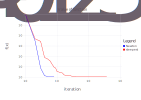

In [162]:
nsamps = length(xvals)
nsamps2 = length(svals)

fx = [fenton(xvals[i]) for i in 1:nsamps]
fx2 = [fenton(svals[i]) for i in 1:nsamps2]


Gadfly.plot(layer(x=1:nsamps, y=fx, Geom.line, Theme(default_color=color("blue"))),
layer(x=1:nsamps2, y=fx2, Geom.line, Theme(default_color=color("red"))),
Guide.xlabel("iteration"), Guide.ylabel("f(x)"), Guide.title("Value of function"),
Guide.manual_color_key("Legend", ["Newton", "steepest"], ["blue", "red"]),
Scale.x_log10, Scale.y_log10)

In [163]:
Gadfly.plot(layer(x=1:nsamps, y=xvals, Geom.line, Theme(default_color=color("blue"))),
layer(x=1:nsamps2, y=svals, Geom.line, Theme(default_color=color("red"))),
Guide.xlabel("iteration"), Guide.ylabel("x"), Guide.title("Value of function"),
Guide.manual_color_key("Legend", ["Newton", "steepest"], ["blue", "red"]),
Scale.x_log10, Scale.y_log10)

TypeError: TypeError: non-boolean (BitArray{1}) used in boolean context

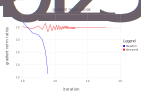

In [164]:
nsamps = length(xvals)

grads = [norm(fenton_g(xvals[i]), 2) for i in 1:nsamps]
grads2 = [norm(fenton_g(svals[i]), 2) for i in 1:nsamps2]

Gadfly.plot(
layer(x=1:nsamps-1, y=grads[2:nsamps,:]./grads[1:nsamps-1,:], Geom.line, Theme(default_color=color("blue"))),
layer(x=1:nsamps2-1, y=grads2[2:nsamps2,:]./grads2[1:nsamps2-1,:], Geom.line, Theme(default_color=color("red"))),
Guide.xlabel("iteration"), Guide.ylabel("gradient norm ratios"), Guide.title("gradient norm ratios"),
Guide.manual_color_key("Legend", ["Newton", "steepest"], ["blue", "red"]),
Scale.x_log10, Scale.y_log10)

In [176]:
grads2[end-10:end]

11-element Array{Any,1}:
 1.07621e-6
 1.04558e-6
 1.01585e-6
 9.86989e-7
 9.58928e-7
 9.31648e-7
 9.05147e-7
 8.79407e-7
 8.54397e-7
 8.30116e-7
 8.06538e-7

In [174]:
[log(x) for x in grads2[end-10:end]]

11-element Array{Any,1}:
 -13.7421
 -13.7709
 -13.7998
 -13.8286
 -13.8574
 -13.8863
 -13.9152
 -13.944 
 -13.9729
 -14.0017
 -14.0305

In [184]:
[log(abs(log(x))) for x in grads[1:end-1]]

7-element Array{Any,1}:
 -0.3124  
 -1.45419 
 -0.218059
  0.779893
  1.49203 
  2.17157 
  2.85485 

In [183]:
[log(x) for x in grads[1:end-1]]

7-element Array{Any,1}:
  -0.731689
   0.233589
  -0.804078
  -2.18124 
  -4.44609 
  -8.77206 
 -17.3718  

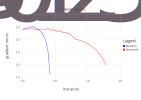

In [150]:
Gadfly.plot(layer(x=1:nsamps, y=grads, Geom.line, Theme(default_color=color("blue"))),
layer(x=1:nsamps2, y=grads2, Geom.line, Theme(default_color=color("red"))),
    Guide.xlabel("iteration"), Guide.ylabel("gradient norm"), Guide.title("gradient norms"),
    Guide.manual_color_key("Legend", ["Newton", "steepest"], ["blue", "red"]),
    Scale.x_log10, Scale.y_log10)

## Rosenbrock function

The Rosenbrock function is defined by:
$$f(x) = \sum_{i=1}^n [ (1-x_{2i-1})^2 + 10(x_{2i} - x_{2i-1}^2)^2 ]$$


In [151]:
xvals = line_search(rosenbrock, ones(100)*2, rosenbrock_g, rosenbrock_h, "newton", 2000);
svals = line_search(rosenbrock, ones(100)*2, rosenbrock_g, rosenbrock_h, "steepest", 2000);

Number of indefinite fixes 0
Number of iterations 9
Iteration: 100
Iteration: 200
Iteration: 300
Iteration: 400
Iteration: 500
Iteration: 600
Iteration: 700
Iteration: 800
Iteration: 900
Iteration: 1000
Iteration: 1100
Iteration: 1200
Iteration: 1300
Iteration: 1400
Iteration: 1500
Iteration: 1600
Number of indefinite fixes 0

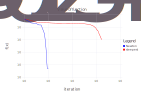

In [152]:
func = rosenbrock
func_g = rosenbrock_g

nsamps = length(xvals)
nsamps2 = length(svals)

fx = [func(xvals[i]) for i in 1:nsamps]
fx2 = [func(svals[i]) for i in 1:nsamps2]

Gadfly.plot(layer(x=1:nsamps, y=fx, Geom.line, Theme(default_color=color("blue"))),
layer(x=1:nsamps2, y=fx2, Geom.line, Theme(default_color=color("red"))),
Guide.xlabel("iteration"), Guide.ylabel("f(x)"), Guide.title("Value of function"),
Guide.manual_color_key("Legend", ["Newton", "steepest"], ["blue", "red"]),
Scale.x_log10, Scale.y_log10)

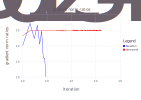

In [154]:
grads = [norm(func_g(xvals[i]), 2) for i in 1:nsamps]
grads2 = [norm(func_g(svals[i]), 2) for i in 1:nsamps2]

Gadfly.plot(
layer(x=1:nsamps-1, y=grads[2:nsamps,:]./grads[1:nsamps-1,:], Geom.line, Theme(default_color=color("blue"))),
layer(x=1:nsamps2-1, y=grads2[2:nsamps2,:]./grads2[1:nsamps2-1,:], Geom.line, Theme(default_color=color("red"))),
Guide.xlabel("iteration"), Guide.ylabel("gradient norm ratios"), Guide.title("gradient norm ratios"),
Guide.manual_color_key("Legend", ["Newton", "steepest"], ["blue", "red"]),
Scale.x_log10, Scale.y_log10)

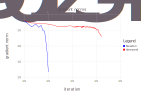

In [155]:
Gadfly.plot(layer(x=1:nsamps, y=grads, Geom.line, Theme(default_color=color("blue"))),
layer(x=1:nsamps2, y=grads2, Geom.line, Theme(default_color=color("red"))),
    Guide.xlabel("iteration"), Guide.ylabel("gradient norm"), Guide.title("gradient norms"),
    Guide.manual_color_key("Legend", ["Newton", "steepest"], ["blue", "red"]),
    Scale.x_log10, Scale.y_log10)

## Cute function

The cute function is given by $f: \mathbb{R}^n \rightarrow \mathbb{R}$
$$ f(x) = \sum_{i=1}^{n-4} (-4x_i+3)^2 + (x_i^2 + 2x_{i+1}^2 + 3x_{i+2}^2 + 4 x_{i+3}^2 + 5x_n^2)^2 $$

In [156]:
xvals = line_search(cute, ones(100)*10, cute_g, cute_h, "newton", 1000);
svals = line_search(cute, ones(100)*10, cute_g, cute_h, "steepest", 2000);

Number of indefinite fixes 15
Number of iterations 15
Number of indefinite fixes 0
Number of iterations 94


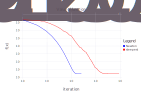

In [157]:
func = cute
func_g = cute_g

nsamps = length(xvals)
nsamps2 = length(svals)

fx = [func(xvals[i]) for i in 1:nsamps]
fx2 = [func(svals[i]) for i in 1:nsamps2]

Gadfly.plot(layer(x=1:nsamps, y=fx, Geom.line, Theme(default_color=color("blue"))),
layer(x=1:nsamps2, y=fx2, Geom.line, Theme(default_color=color("red"))),
Guide.xlabel("iteration"), Guide.ylabel("f(x)"), Guide.title("Value of function"),
Guide.manual_color_key("Legend", ["Newton", "steepest"], ["blue", "red"]),
Scale.x_log10, Scale.y_log10)

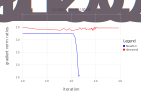

In [159]:
grads = [norm(func_g(xvals[i]), 2) for i in 1:nsamps]
grads2 = [norm(func_g(svals[i]), 2) for i in 1:nsamps2]

Gadfly.plot(
layer(x=1:nsamps-1, y=grads[2:nsamps,:]./grads[1:nsamps-1,:], Geom.line, Theme(default_color=color("blue"))),
layer(x=1:nsamps2-1, y=grads2[2:nsamps2,:]./grads2[1:nsamps2-1,:], Geom.line, Theme(default_color=color("red"))),
Guide.xlabel("iteration"), Guide.ylabel("gradient norm ratios"), Guide.title("gradient norm ratios"),
Guide.manual_color_key("Legend", ["Newton", "steepest"], ["blue", "red"]),
Scale.x_log10, Scale.y_log10)

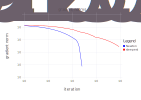

In [160]:
Gadfly.plot(layer(x=1:nsamps, y=grads, Geom.line, Theme(default_color=color("blue"))),
layer(x=1:nsamps2, y=grads2, Geom.line, Theme(default_color=color("red"))),
    Guide.xlabel("iteration"), Guide.ylabel("gradient norm"), Guide.title("gradient norms"),
    Guide.manual_color_key("Legend", ["Newton", "steepest"], ["blue", "red"]),
    Scale.x_log10, Scale.y_log10)